In [1]:
fastq_fpath = './SRR18961685-5000.fastq'

### Definizione della funzione `ascii_to_quality()`

La funzione prende come argomento un carattere e restituisce il valore di qualità codificato secondo la seguente funzione:

    c = ASCII(min(93,q)+33)

In [2]:
def ascii_to_quality(c):
    return ord(c) - 33

### Lettura file

In [3]:
with open(fastq_fpath, 'r') as f:
    fastq_lines = f.readlines()

In [4]:
seqs = []
quals = []
ids = []

for ix in range(0, len(fastq_lines), 4):
    assert(fastq_lines[ix][1:] == fastq_lines[ix+2][1:])
    seqs.append(fastq_lines[ix+1].strip())
    quals.append(fastq_lines[ix+3].strip())
    ids.append(fastq_lines[ix][1:].strip())

assert(len(seqs) == len(quals))

nquals = [list(map(ascii_to_quality, x)) for x in  quals]

In [5]:
print(seqs[0])
print(quals[0])
print(nquals[0])

TTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGTTTAGGGTTAGGGTTACGGATAGGGTAACGTGTAGCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCATAACCCTAACCCAA
@A?ACDBECEEECECEEECECEE>@@CEEECEC?EEC?CEE//EC0EE//:0E.//C-@=+D:0..C)D-?///:1@@@>ABCCDBCDDDECDDDDDCDDDDECDDDDECDDDDECD<D,DCDD+DEC,;D,6CD<,*.C,-:,BC,-@-,@
[31, 32, 30, 32, 34, 35, 33, 36, 34, 36, 36, 36, 34, 36, 34, 36, 36, 36, 34, 36, 34, 36, 36, 29, 31, 31, 34, 36, 36, 36, 34, 36, 34, 30, 36, 36, 34, 30, 34, 36, 36, 14, 14, 36, 34, 15, 36, 36, 14, 14, 25, 15, 36, 13, 14, 14, 34, 12, 31, 28, 10, 35, 25, 15, 13, 13, 34, 8, 35, 12, 30, 14, 14, 14, 25, 16, 31, 31, 31, 29, 32, 33, 34, 34, 35, 33, 34, 35, 35, 35, 36, 34, 35, 35, 35, 35, 35, 34, 35, 35, 35, 35, 36, 34, 35, 35, 35, 35, 36, 34, 35, 35, 35, 35, 36, 34, 35, 27, 35, 11, 35, 34, 35, 35, 10, 35, 36, 34, 11, 26, 35, 11, 21, 34, 35, 27, 11, 9, 13, 34, 11, 12, 25, 11, 33, 34, 11, 12, 31, 12, 11, 31]


### Determinare la distribuzione della qualità media dei reads

In [6]:
import statistics

avg_read_qual = list(map(statistics.mean, nquals))
print(avg_read_qual[:10])

[28.842105263157894, 33.223684210526315, 34.046052631578945, 32.828947368421055, 32.64473684210526, 31.914473684210527, 34.78947368421053, 34.19078947368421, 33.30263157894737, 33.473684210526315]


In [7]:
avg_read_qual = [round(x) for x in avg_read_qual]
print(avg_read_qual[:10])

[29, 33, 34, 33, 33, 32, 35, 34, 33, 33]


(array([2.000e+00, 2.000e+00, 7.000e+00, 1.700e+01, 2.300e+01, 2.700e+01,
        2.900e+01, 5.900e+01, 9.700e+01, 4.737e+03]),
 array([24. , 25.1, 26.2, 27.3, 28.4, 29.5, 30.6, 31.7, 32.8, 33.9, 35. ]),
 <BarContainer object of 10 artists>)

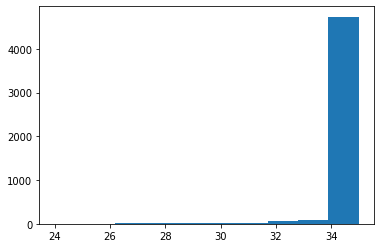

In [8]:
import matplotlib.pyplot as plt
plt.hist(avg_read_qual)

### Determinare la distribuzione della qualità media per posizione lungo i reads

In [9]:
pos_qual = [[row[i] for row in nquals] for i in range(len(nquals[0]))]
print(len(pos_qual), "x", len(pos_qual[0]))

152 x 5000


In [10]:
avg_pos_qual = [statistics.mean(x) for x in pos_qual]
print(avg_pos_qual)

[30.784, 31.276, 31.2662, 31.247, 33.2824, 34.2708, 34.1764, 35.2354, 35.2494, 35.2044, 35.282, 35.209, 35.2166, 35.2914, 35.21, 35.2336, 35.1926, 35.2146, 35.1502, 35.1434, 35.1908, 35.1508, 35.2192, 35.1612, 35.1708, 35.1674, 35.1906, 35.1494, 35.1144, 35.1684, 35.1366, 35.149, 35.1474, 35.0964, 35.1334, 35.1572, 35.136, 35.0228, 35.1296, 35.1104, 35.1246, 35.1178, 35.2034, 35.124, 35.1016, 35.1554, 35.1176, 35.1002, 35.1294, 35.1246, 35.1216, 35.1214, 35.0944, 35.0526, 35.131, 35.1426, 35.0496, 35.1508, 35.047, 35.1268, 35.1212, 35.0268, 35.1254, 35.188, 35.0576, 35.0542, 35.066, 35.0974, 35.105, 35.0498, 34.1564, 33.1122, 31.108, 31.1824, 31.2418, 32.1554, 30.7172, 31.2314, 30.2374, 30.2046, 32.1886, 33.1558, 34.0654, 34.039, 34.069, 34.0488, 34.0768, 35.0372, 35.0406, 35.134, 35.1066, 35.0394, 35.0234, 35.0266, 35.0548, 35.0826, 34.0924, 35.0232, 35.057, 34.9142, 34.9562, 35.0982, 35.0302, 35.0608, 34.9474, 35.0466, 35.0136, 34.9276, 34.959, 34.91, 35.0198, 35.0288, 34.9606, 35.00

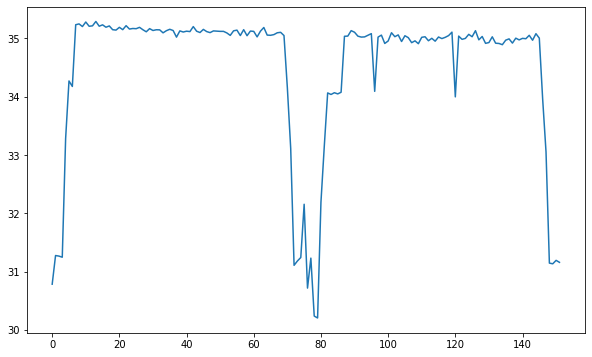

In [11]:
fig = plt.figure(figsize = (10,6))
plt.plot(avg_pos_qual)

### Determinare la distribuzione delle basi `A`, `C`, `G`, `T` per posizione

In [12]:
pos_bases = list(map(list, zip(*seqs)))
print(len(pos_bases), "x", len(pos_bases[0]))

152 x 5000


In [13]:
# basecnts = [[sum([b == n]) for n in "ACGT"] for b in pos_bases[0]]
basecnts = [[sum([b == n for b in pos])/len(pos) for n in "ACGT"] for pos in pos_bases]
print(basecnts[:2])

[[0.2328, 0.2774, 0.2722, 0.2176], [0.2216, 0.2598, 0.2784, 0.2396]]


In [14]:
basecnts = list(map(list, zip(*basecnts)))
print(len(basecnts), "x", len(basecnts[0]))

4 x 152


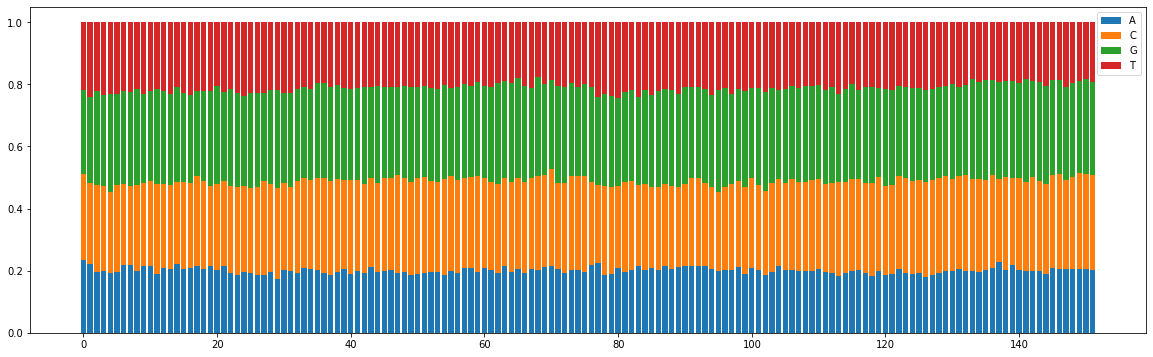

In [15]:
fig = plt.figure(figsize = (20,6))
plt.bar(range(152), basecnts[0], label="A")
plt.bar(range(152), basecnts[1], bottom=basecnts[0], label="C")
plt.bar(range(152), basecnts[2], bottom=[sum(x) for x in zip(basecnts[0],basecnts[1])], label="G")
plt.bar(range(152), basecnts[3], bottom=[sum(x) for x in zip(basecnts[0],basecnts[1],basecnts[2])], label="T")
plt.legend()

### Eseguire il *trimming* dei reads

a) Scegliere una soglia minima di qualità.

In [16]:
minq = 20

b) Definire una funzione che prenda come argomento una stringa di qualità (caratteri ASCII) e una soglia minima e restituisca il più lungo intervallo di posizioni contenente solo caratteri che codificano una qualità non al di sotto della soglia minima.

In [71]:
def get_trimming_interval(qual, minqual):
    maxint = (0, 0, 0) #lunghezza, start, end (non incluso)
    s = 0
    while s < len(qual):
        i = 0
        while s+i < len(qual) and qual[s+i] >= minqual:
            i+=1
        if i > maxint[0]:
            maxint = (i, s, s+i)
        s = s + i+1
    return maxint[1:]
get_trimming_interval(nquals[0], minq)


(76, 119)

c) Definire una funzione che prenda come argomenti una soglia minima di qualità e un read in formato `FASTQ` e restituisca il read in formato `FASTQ` dopo essere stato sottoposto a *trimming*.

In [72]:
def get_trimmed_read(minq, rid, seq, nqual, qual):
    s, e = get_trimming_interval(nqual, minq)
    if e-s > 0:
        return [
            f"@{rid}",
            seq[s:e],
            f"+{rid}",
            qual[s:e]
        ]
        
get_trimmed_read(minq, ids[0], seqs[0], nquals[0], quals[0])

['@SRR18961685.1 1 length=152',
 'CCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC',
 '+SRR18961685.1 1 length=152',
 '@@@>ABCCDBCDDDECDDDDDCDDDDECDDDDECDDDDECD<D']

d) Sistemare la lenght

In [74]:
def get_trimmed_read(minq, rid, seq, nqual, qual):
    s, e = get_trimming_interval(nqual, minq)
    if e-s > 0:
        new_rid=rid.replace("length=152", f"length={e-s}")
        return [
            f"@{new_rid}",
            seq[s:e],
            f"+{new_rid}",
            qual[s:e]
        ]
        
fastq = [get_trimmed_read(minq, ids[i], seqs[i], nquals[i], quals[i]) for i in range(len(seqs))]

In [76]:
len([x for x in fastq if len(x[1]) >= 20 ])

4953